In [2]:
import numpy as np
from sklearn import datasets
from matplotlib import pyplot as plt
%matplotlib inline

## 样例数据的生成

In [3]:
# 生成样例数据
noisy_moons, labels = datasets.make_moons(n_samples=1000, noise=.05, random_state=10) # 生成 1000 个样本并添加噪声
# 其中800个作为训练数据,200个作为测试数据
X_train,Y_train,X_test,Y_test = noisy_moons[:-200],labels[:-200],noisy_moons[-200:],labels[-200:]
print(len(X_train),len(Y_train),len(X_test),len(Y_test))

800 800 200 200


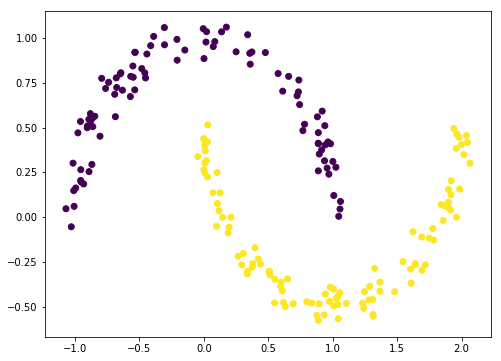

In [4]:
plt.figure(figsize=(8,6))
plt.scatter(X_test[:,0],X_test[:,1],c=Y_test)

## 网络的构建

In [5]:
import torch as t
from torch import nn
from torch import optim
from torch.autograd import Variable
import torch.utils.data as Data
from IPython import display

In [6]:
# 网络的构建
class classifer(nn.Module):
    def __init__(self):
        super(classifer, self).__init__()
        self.class_col = nn.Sequential(
            nn.Linear(2,16),
            nn.ReLU(),
            nn.Linear(16,32),
            nn.ReLU(),
            nn.Linear(32,32),
            nn.ReLU(),
            nn.Linear(32,32),
            nn.ReLU(),
            nn.Linear(32,2),
        )
    def forward(self, x):
        out = self.class_col(x)
        return out

In [7]:
# ----------------
# 定义优化器及损失函数
# ----------------
from torch import optim
model = classifer() # 实例化模型
loss_fn = nn.CrossEntropyLoss() # 定义损失函数
optimiser = optim.SGD(params=model.parameters(), lr=0.05) # 定义优化器

In [11]:
print(model)

classifer(
  (class_col): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=32, bias=True)
    (5): ReLU()
    (6): Linear(in_features=32, out_features=32, bias=True)
    (7): ReLU()
    (8): Linear(in_features=32, out_features=2, bias=True)
  )
)


## 定义变量

In [8]:
# ------
# 定义变量
# ------
from torch.autograd import Variable
import torch.utils.data as Data
X_train = t.Tensor(X_train) # 输入 x 张量
X_test = t.Tensor(X_test)
Y_train = t.Tensor(Y_train).long() # 输入 y 张量
Y_test = t.Tensor(Y_test).long()
# 使用batch训练
torch_dataset = Data.TensorDataset(X_train, Y_train) # 合并训练数据和目标数据
MINIBATCH_SIZE = 25
loader = Data.DataLoader(
    dataset=torch_dataset,
    batch_size=MINIBATCH_SIZE,
    shuffle=True,
    num_workers=2           # set multi-work num read data
)

## 进行训练

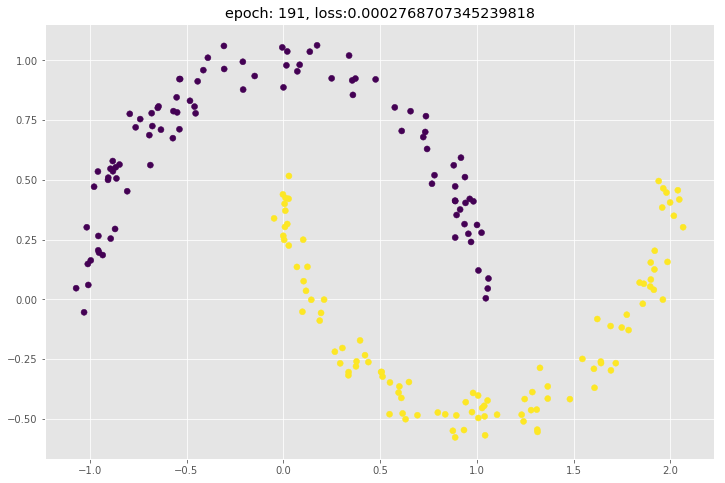

In [9]:
# ---------
# 进行训练
# ---------
loss_list = []
for epoch in range(200):
    for step, (batch_x, batch_y) in enumerate(loader):
        batch_x = Variable(batch_x)
        batch_y = Variable(batch_y)
        optimiser.zero_grad() # 梯度清零
        out = model(batch_x) # 前向传播
        loss = loss_fn(out, batch_y) # 计算损失
        loss.backward() # 反向传播
        optimiser.step() # 随机梯度下降
    loss_list.append(loss)
    # 下面都是绘图的代码, 可以不看, 记录loss即可
    if epoch%10==0:
        outputs = model(X_test)
        _, predicted = t.max(outputs, 1)
        display.clear_output(wait=True)
        plt.style.use('ggplot')
        plt.figure(figsize=(12, 8))
        plt.scatter(X_test[:,0].numpy(),X_test[:,1].numpy(),c=predicted)
        plt.title("epoch: {}, loss:{}".format(epoch+1, loss))
        plt.show()

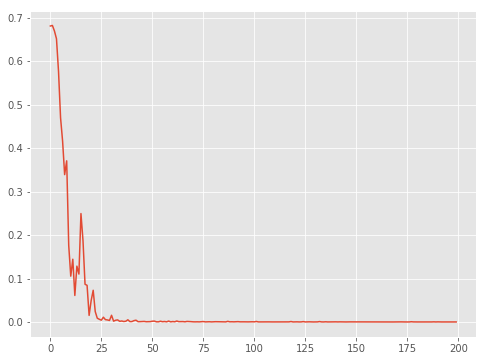

In [10]:
plt.figure(figsize=(8,6))
plt.plot(loss_list)